# Linear Regression with Python

## Polynomial Regression using Python


### What is linear regression?
Linear Regression attempts to find a relationship between a dependent variable and one or more explantory (or independent) variables. In case of simple linear regression where there is only one explanatory variable, linear regression is described as a general equation as shown below.

\begin{align}
y = b_0 + b_1x + \epsilon
\end{align}

where y is the dependent variable, x is the explanatory variable with coefficient b<sub>1</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

For multiple linear regression, we have two or more explanatory variables so the equation. It is described as a general equation as shown below. 

\begin{align}
y = b_0 + b_1x_1 + ... + b_px_p + \epsilon 
\end{align}

where y is the dependent variable, x<sub>1</sub>...x<sub>p</sub> are the explanatory variables with regression coefficients b<sub>1</sub>...b<sub>p</sub>, and b<sub>0</sub> is the intercept with the error term $\epsilon$.

### Polynomial Regression
Polynomial regression is used to fit non-linear data using linear models. This enables inclusion of non-linear trends which are not captured by a linear approach. This is done by transforming existing data into its higher order terms. Eg., Some new features will be 2nd or 3rd powers of old features.

In [1]:
# Import Libraries
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
from statsmodels.graphics.gofplots import qqplot_2samples

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectKBest
from sklearn.preprocessing import PolynomialFeatures

### About the dataset
This is a simulated dataset made for teaching regression containing 10 independent variables named **Feat01, Feat02..., Feat10** and a dependent variable called **Target**. 

### The task
The task at hand is to predict the **Target** variable such that the values of predictions are as close to the actual values as possible. This will be done using a polynomial regression model.

In [2]:
# Loading data
data = pd.read_csv("data.csv")
data.head()

,Feat01,Feat02,Feat03,Feat04,Feat05,Feat06,Feat07,Feat08,Feat09,Feat10,Target
0,0,11617.463,135.935905,10960,491.597396,80.714963,0.675678,16.891946,0.506758,1.198996,137
1,0,1086607.005,1983.900611,13065,1391.028397,64.221576,0.880523,0.146754,0.146754,1.230974,335
2,0,37945.952,2726.252884,8772,222.952910,37.589307,0.325336,16.266790,0.488004,1.208015,172
3,0,79471.821,3448.065646,36414,883.345912,662.170505,0.257565,0.000000,0.128782,1.256901,867
4,1,5486.580,1509.753541,13040,742.253326,99.315014,0.129816,0.000000,0.129816,1.255410,815


In [3]:
X = data.drop(["Target"],axis=1) # Explanatory(independent) variables
y = data["Target"] # Dependent variable

### Train/test split
Data is divided into training and test set. Training set is used to train the linear model and test set is used evaluate the trained model. Here, we are using 70% data in the training set, leaving 30% data for the test set. The train-test set ratio is determined keeping in mind the size of data. Larger test sets (around 20-30% data) provide more reliable evaluation results but at the same time training set should be enough so that underfitting does not occur.  

In [4]:
# A 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)

### Training a linear regression model
We will train a linear regression model using all ten available features. The `fit` method of the `LinearRegression()` class trains models and estimates the best possible intercept and coefficient(s). 

In [5]:
# Fitting a linear model for multiple linear regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# The coefficients for each columns
model_coefs = pd.DataFrame({'Feature/Column':list(X_train.columns),"Coefficients":model.coef_})
model_coefs

,Feature/Column,Coefficients
0,Feat01,2.319425
1,Feat02,0.000010
2,Feat03,0.006078
3,Feat04,0.001139
4,Feat05,0.013329
5,Feat06,0.111174
6,Feat07,0.511887
7,Feat08,-0.123155
8,Feat09,-16.116907
9,Feat10,11177.060571


In [7]:
# The model's intercept
model.intercept_

-13397.877366112254

In [8]:
# Taking predictions
y_pred = model.predict(X_test)

### Model Evaluation
We will be evaluating the model now. We will start by using the metrics R-squared score and RMSE.

**R-squared score** - This score varies from 0 to 1 and represents the proportion of variance of the dependent variable explained by the independent variable(s). It conveys the extent to which the variance of one variable explains the variance of the other. The ideal score is 1.0 which conveys that 100% of the variance of the dependent variable is explained by the independent variables.

**Root Mean Squared Error(RMSE)** - RMSE is the standard deviation of the residuals (prediction errors). It measures the spread of the data around the line of best fit. RMSE is always non-negative with a value of 0 being ideal. A lower RMSE is better than a higher one. RMSE of two different datasets should not be compared as this measure is dependent on the scales of the data.

\begin{align}
RMSE = \sqrt{\frac{\sum_{i=1}^n \left(\hat{y_i} - y_i \right)^2}{n}}
\end{align}

Here, $\hat{y}$ is the predicted value and y is the observed value. n is the number of rows in the dataset.

In [9]:
print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred)))
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

The R-squared score is 0.8978
The Root Mean Squared error is 82.8497


In [10]:
# 3-Fold cross-validation scored using R^2 score
r2_cross_val = cross_val_score(LinearRegression(),X,y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
# 3-Fold cross-validation scored using RMSE
rmse_cross_val = cross_val_score(LinearRegression(),X,y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

The 3-fold CV R^2 scores are [0.89411875 0.89787452 0.89275597] 
with a mean R^2 score of 0.8949
The 3-fold CV RMSE scores are [85.04847542209288, 83.56004204324616, 84.72165770028043] 
with a mean RMSE of 84.4434


### Polynomial Regression
We will start with a Polynomial Regression model with 2nd degree polynomial features.

In [11]:
poly = PolynomialFeatures(2) 
X_poly2 = poly.fit_transform(X)

print("The number of features has increased from {} to {} with the inclusion of 2nd degree polynomial features.".format(X.shape[1],X_poly2.shape[1]))

The number of features has increased from 10 to 66 with the inclusion of 2nd degree polynomial features.


Let's estimate the results of polynomial regression of 2nd degree.

In [12]:
r2_cross_val = cross_val_score(LinearRegression(),X_poly2,y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
rmse_cross_val = cross_val_score(LinearRegression(),X_poly2,y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

The 3-fold CV R^2 scores are [0.97459194 0.97643792 0.97270716] 
with a mean R^2 score of 0.9746
The 3-fold CV RMSE scores are [41.662253199217595, 40.13640230311228, 42.73977900115019] 
with a mean RMSE of 41.5128


The R^2 score has increased significantly. RMSE is now less than half. Hence, due to polynomial features, we have a much better model now. Let's try this for 3rd degree polynomial features.

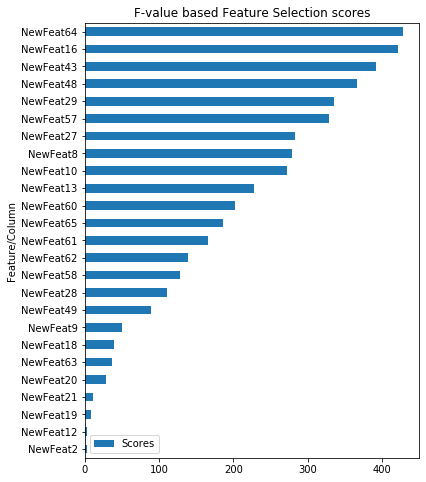

In [13]:
# Feature selection using SelectKBest
# Fit a model using training data using F-value method 
skb = SelectKBest(f_regression,k=25).fit(X_poly2, y)
skb_df = pd.DataFrame({"Feature/Column": ["NewFeat{}".format(i) for i in range(1,X_poly2.shape[1]+1)],"Scores":skb.scores_})

skb_df.sort_values("Scores",ascending=True)[:25].set_index("Feature/Column").plot(kind="barh",figsize=(6,8))
plt.title("F-value based Feature Selection scores")
plt.show()

In [14]:
X_poly2_25 = skb.transform(X_poly2)
r2_cross_val = cross_val_score(LinearRegression(),X_poly2_25,y,cv=3,scoring="r2")
print("The 3-fold CV R^2 scores are {} \nwith a mean R^2 score of {:.4f}".format(r2_cross_val,np.mean(r2_cross_val)))
rmse_cross_val = cross_val_score(LinearRegression(),X_poly2_25,y,cv=3,scoring="neg_root_mean_squared_error")
print("The 3-fold CV RMSE scores are {} \nwith a mean RMSE of {:.4f}".format([-i for i in rmse_cross_val],-np.mean(rmse_cross_val)))

The 3-fold CV R^2 scores are [0.99246364 0.99263726 0.99232398] 
with a mean R^2 score of 0.9925
The 3-fold CV RMSE scores are [22.69017155759727, 22.43630930491654, 22.666060448580822] 
with a mean RMSE of 22.5975


This is a near perfect model with R^2 score close to 1 and RMSE has almost halved when compared to the model with all 2nd degree polynomial features. Let's visualize the results by comparing QQ-plots and residuals.

**QQ-plot** is formed when quantiles of two variables are plotted against each other. Ideally, all points should lie on or close to the straight line at an angle of 45&deg;.

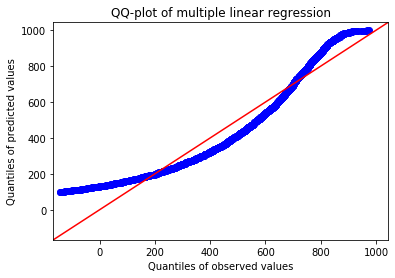

In [15]:
## Normal QQ-plot
qqplot_2samples(y_test,y_pred,line='45')
plt.title("QQ-plot of multiple linear regression")
plt.xlabel("Quantiles of observed values")
plt.ylabel("Quantiles of predicted values")
plt.show()

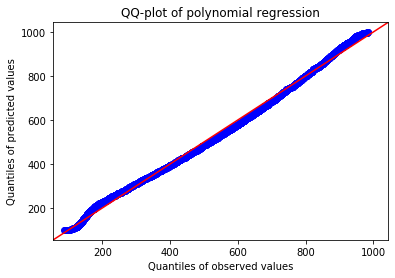

In [16]:
# Splitting the new top 25 features of 2nd degree polynomial data
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly2_25, y,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    shuffle=True)
# Training a linear model
poly_model = LinearRegression()
poly_model.fit(X_train_poly,y_train)
poly_pred = poly_model.predict(X_test_poly) # Taking predictions

## Normal QQ-plot
qqplot_2samples(y_test,poly_pred,line='45')
plt.title("QQ-plot of polynomial regression")
plt.xlabel("Quantiles of observed values")
plt.ylabel("Quantiles of predicted values")
plt.show()

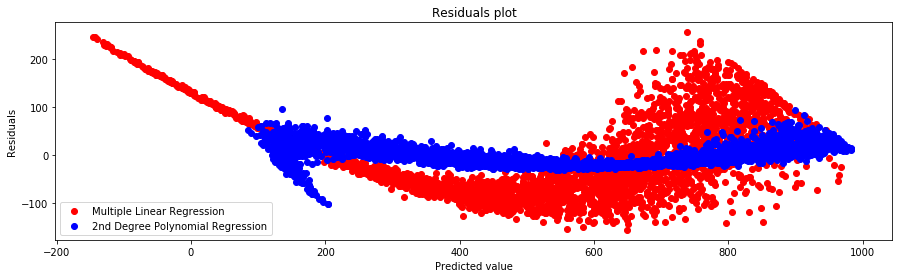

In [17]:
# Residuals plot
plt.figure(figsize=(15,4))
plt.scatter(y_pred,y_test-y_pred,color="red", label="Multiple Linear Regression")
plt.scatter(poly_pred,y_test-poly_pred,color="blue", label="2nd Degree Polynomial Regression")
plt.title("Residuals plot")
plt.legend()
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.show()

The QQ-plot for polynomial regression is near perfect while the QQ-plot for multiple linear regression has very few points lying on the 45&deg; line. The residuals plot of polynomial regression has all positive values and the residuals are much closer to zero as compared to the residuals plot of multiple linear regression.

**Conclusion:** We have seen the effect of polynomial features on final results. We can increase the degree of polynomial features for more features though we already have a near perfect model.